<a href="https://www.kaggle.com/taylorwhite/video-game-stats?scriptVersionId=85741645" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Lab 12 - Data Analysis with Pandas
# Video Game Sales
# Taylor White - 1/19/2022

References:  
https://www.geeksforgeeks.org/python-pandas-series-std/  
https://codefather.tech/blog/pandas-standard-deviation/  
https://github.com/matplotlib/cheatsheets  
https://matplotlib.org/stable/api/pyplot_summary.html  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [2]:
filename = '/kaggle/input/videogamesales/vgsales.csv'
df = pd.read_csv(filename)

## 1. Which company is the most common video game publisher?

<AxesSubplot:>

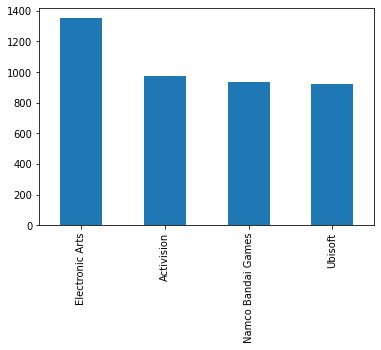

In [3]:
df['Publisher'].value_counts().head(4).plot.bar()

### Answer: Electronic Arts with 1351 entries

--------------------------------------------------------------------------
--------------------------------------------------------------------------

## 2. What’s the most common platform?

<AxesSubplot:ylabel='Platform'>

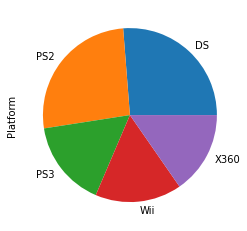

In [4]:
df['Platform'].value_counts().head().plot.pie()

### Answer: DS with 2163 entries

--------------------------------------------------------------------------
--------------------------------------------------------------------------

## 3. What about the most common genre?

<AxesSubplot:>

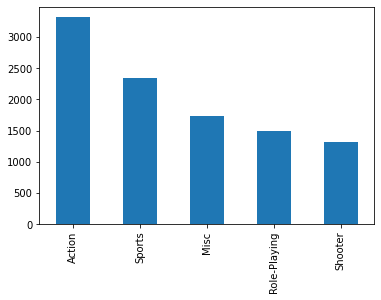

In [5]:
df['Genre'].value_counts().head().plot.bar()

### Answer: Action with 3316 entries

--------------------------------------------------------------------------
--------------------------------------------------------------------------

## 4. What are the top 20 highest grossing games?

In [6]:
df[['Name', 'Global_Sales']].sort_values('Global_Sales', ascending=False).head(25)

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.02
8,New Super Mario Bros. Wii,28.62
9,Duck Hunt,28.31


--------------------------------------------------------------------------
--------------------------------------------------------------------------

## 5. For North American video game sales, what’s the median?

In [7]:
median = df['NA_Sales'].median()
print('median Sales are $' + str(median * 1000000))

median Sales are $80000.0


### Answer: NA_Sales $80000.0

--------------------------------------------------------------------------
--------------------------------------------------------------------------

## 5a. Provide a secondary output showing ten games surrounding the median sales output.

In [8]:
ten_median = df[df['NA_Sales'] == median]
ten_median.head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
446,447,Dragon Warrior IV,NES,1990.0,Role-Playing,Enix Corporation,0.08,0.00,3.03,0.01,3.12
497,498,World Soccer Winning Eleven 7 International,PS2,2003.0,Sports,Konami Digital Entertainment,0.08,1.24,1.13,0.45,2.90
1617,1619,Farming Simulator 2015,PC,2014.0,Simulation,Focus Home Interactive,0.08,1.02,0.00,0.13,1.23
1926,1928,Pro Evolution Soccer 2008,X360,2007.0,Sports,Konami Digital Entertainment,0.08,0.90,0.04,0.05,1.07
2067,2069,Winning Eleven: Pro Evolution Soccer 2007 (All...,X360,2006.0,Sports,Konami Digital Entertainment,0.08,0.90,0.02,0.00,1.00
2373,2375,Phantasy Star Portable 2,PSP,2009.0,Role-Playing,Sega,0.08,0.11,0.62,0.06,0.88
2579,2581,The Sims 2: Castaway,PSP,2007.0,Simulation,Electronic Arts,0.08,0.46,0.00,0.25,0.80
3186,3188,SingStar Queen,PS2,2009.0,Misc,Sony Computer Entertainment,0.08,0.12,0.00,0.44,0.63
3503,3505,Top Spin 3,PS3,2008.0,Action,Take-Two Interactive,0.08,0.37,0.00,0.12,0.57
3703,3705,Sonic & All-Stars Racing Transformed,PS3,2012.0,Racing,Sega,0.08,0.33,0.01,0.11,0.54


--------------------------------------------------------------------------
--------------------------------------------------------------------------

## 6. For the top-selling game of all time, how many standard deviations above/below the mean are its sales for North America?

In [9]:
na_mean = df['NA_Sales'].mean()
na_std = df['NA_Sales'].std()
na_top = df.sort_values('NA_Sales', ascending=False)['NA_Sales'][0]

print(round((na_top - na_mean)/na_std))

50


## Answer: 50

--------------------------------------------------------------------------
--------------------------------------------------------------------------

## 7. The Nintendo Wii seems to have outdone itself with games. How does its average number of sales compare with all of the other platforms?

In [10]:
wii_sales =df[df['Platform'] == 'Wii']['Global_Sales'].mean()
other_sales = df[df['Platform'] != 'Wii']['Global_Sales'].mean()

print('The Wii sells ' + str(round(wii_sales / other_sales, 2)) + ' times more than it competitors')


The Wii sells 1.34 times more than it competitors


--------------------------------------------------------------------------
--------------------------------------------------------------------------

## 8. What are the 10 lowest grossing games in Europe?

In [11]:
df[['Name', 'EU_Sales']].sort_values('EU_Sales', ascending=False).tail(10)

,Name,EU_Sales
12571,DuckTales: Remastered,0.0
12570,Record of Lodoss War: Eiyuu Sensou,0.0
7941,One Piece: Unlimited Adventure,0.0
7942,Remington Super Slam Hunting: North America,0.0
7945,Face Training,0.0
12566,Winning Post 4 Maximum,0.0
12565,World Soccer Winning Eleven 9 (US sales),0.0
12564,Satisfashion,0.0
12563,Attack on Titan (KOEI),0.0
16597,Spirits & Spells,0.0


--------------------------------------------------------------------------
--------------------------------------------------------------------------

## 9. What are the best selling games before 2006?

In [12]:
df[df['Year'] < 2006].head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76


--------------------------------------------------------------------------
--------------------------------------------------------------------------

## 10. What are the 20 best selling games in Japan? 

In [13]:
df[['Name', 'JP_Sales']].sort_values('JP_Sales', ascending=False).head(20)

,Name,JP_Sales
4,Pokemon Red/Pokemon Blue,10.22
12,Pokemon Gold/Pokemon Silver,7.20
1,Super Mario Bros.,6.81
6,New Super Mario Bros.,6.50
20,Pokemon Diamond/Pokemon Pearl,6.04
26,Pokemon Black/Pokemon White,5.65
25,Pokemon Ruby/Pokemon Sapphire,5.38
41,Animal Crossing: Wild World,5.33
27,Brain Age 2: More Training in Minutes a Day,5.32
214,Monster Hunter Freedom 3,4.87
